# 0. Read, Inspect, Preprocess and Split Data

In [1]:
import pandas as pd

In [2]:
basePath = "/Users/phuonglh/vlp/s2s/dat/"

In [3]:
pathY = f"{basePath}y.80-19.tsv"

In [4]:
dfY = pd.read_csv(pathY, delimiter="\t", header=None)

/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,27,29,30,31,33,34,35,36,37,38,39,40,42,44,45,47,48,51,52,54,55,57,58,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,90,91,92,93,94,96,97,99,100,103,104,105,106,108,110,112,113,114,115,116,117,119,120,121,123,124,125,127,128,129,130,133,135,138,139,140,141,143,144,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [452]:
# dfY.loc[dfY[3] == '-'] # search for an anomaly line

In [5]:
dfY['MuongTe'] = pd.to_numeric(dfY.loc[:,3])
dfY['Date'] = dfY.loc[:, 0:2].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dfY['Date'] = pd.to_datetime(dfY['Date'])

In [6]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,MuongTe,Date
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,...,0.3,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,...,0.0,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,...,0.0,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30


In [7]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Precipitation')

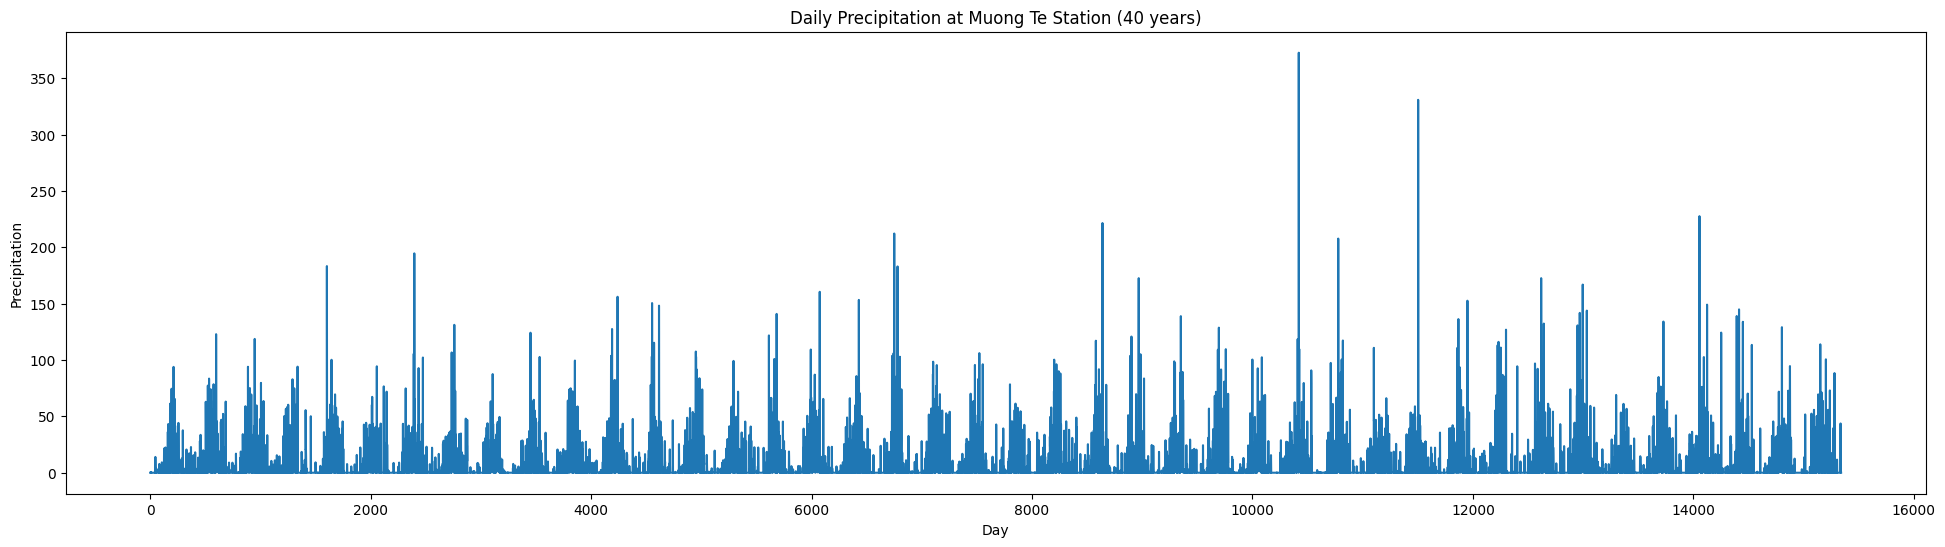

In [8]:
plt.figure(figsize=(24,6))
plt.plot(dfY['MuongTe'])
plt.title('Daily Precipitation at Muong Te Station (40 years)')
plt.xlabel('Day')
plt.ylabel('Precipitation')

In [93]:
def isHeavy(value):
    if value >= 50:
        return 1
    else:
        return 0

In [94]:
def isExtreme(value):
    if value >= 100:
        return 1
    else:
        return 0

In [95]:
def anomalies(value):
    if value >= 100:
        return 2
    elif value >= 50:
        return 1
    else:
        return 0

In [96]:
y = dfY['MuongTe'].apply(lambda v: isHeavy(v))

In [97]:
dfY['y'] = y

In [99]:
dfY

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,MuongTe,Date,y
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01,0
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02,0
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03,0
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,...,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04,0
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,...,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27,0
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,...,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28,0
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,...,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29,0
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,...,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30,0


In [100]:
sum(y)

416

In [101]:
dfY[y == 1]

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,MuongTe,Date,y
180,1980,6,29,52.4,95.3,114.2,157.1,103.8,130.6,116,...,9.9,13.6,6.4,13.2,7.7,0.9,0.5,52.4,1980-06-29,1
182,1980,7,1,61.3,51.4,7.8,0.8,17.3,3.3,5,...,12.8,10.6,0.0,0.0,2.2,0,9.5,61.3,1980-07-01,1
194,1980,7,13,74.5,66.7,102.8,56.5,109.2,31.3,24.7,...,0.0,0.8,0.0,0.0,2.2,0.7,0.0,74.5,1980-07-13,1
212,1980,7,31,93.9,26.7,45.2,6.3,20.6,1.2,1.2,...,14.8,2.1,10.7,0.0,0.0,9.6,0.0,93.9,1980-07-31,1
224,1980,8,12,65.4,53.8,67,2.8,39.3,1.4,0.5,...,0.1,0.0,22.4,11.2,16.1,6.8,7.8,65.4,1980-08-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15202,2021,8,15,100.6,68.1,90.3,95.2,31.8,31.3,15.9,...,0.0,0.0,0.0,0.0,2.2,1.0,16.0,100.6,2021-08-15,1
15222,2021,9,4,55.8,44.4,0.5,1.4,33.8,12.0,10.7,...,3.2,0.0,12.5,55.9,88.2,19.1,32.8,55.8,2021-09-04,1
15238,2021,9,20,73.0,32.5,39.5,29.2,51.4,4.7,11.3,...,6.0,11.2,29.5,12.5,18.8,20.7,0.3,73.0,2021-09-20,1
15280,2021,11,1,88.4,96.6,73.7,6.8,31.5,3.0,10.4,...,3.3,0.0,0.0,14.0,3.4,0.0,7.4,88.4,2021-11-01,1


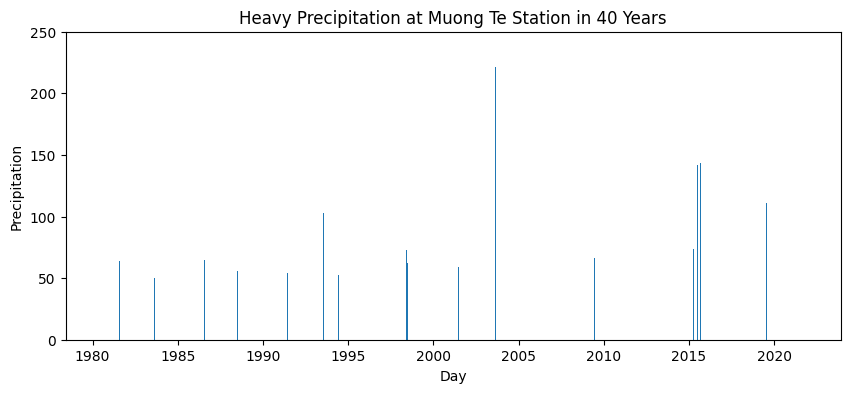

In [102]:
plt.figure(figsize=(10,4))
plt.ylim(0, 250)
plt.bar(dfY['Date'][y == 1], dfY['MuongTe'][y == 1])
plt.title('Heavy Precipitation at Muong Te Station in 40 Years')
plt.xlabel('Day')
plt.ylabel('Precipitation')
plt.savefig('MuongTe-Heavy50mm')

In [49]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [50]:
featurePaths = [f"{basePath}{f}.80-19.csv" for f in ["geo", "hum", "slp", "ssm", "uvw"]]

In [51]:
print(featurePaths)

['/Users/phuonglh/vlp/s2s/dat/geo.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/hum.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/slp.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/ssm.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/uvw.80-19.csv']


In [52]:
dfs = [pd.read_csv(path) for path in featurePaths]

In [53]:
df = pd.concat(dfs, axis=1)

In [54]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010
...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000


In [55]:
df['Date'] = dfY['Date']
df['y'] = dfY['y']

In [56]:
features = list(df.columns.values)[0:-2] # remove the last two columns which are not the main features ('Date' and 'y')

In [57]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008,1980-01-01,0
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010,1980-01-02,0
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007,1980-01-03,0
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010,1980-01-04,0
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000,2019-12-27,0
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002,2019-12-28,0
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000,2019-12-29,0
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000,2019-12-30,0


In [59]:
# train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='y', extra_feature_col=features, with_split=True, val_ratio=0.1, test_ratio=0.1)
train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='y', extra_feature_col=[], with_split=True, val_ratio=0.1, test_ratio=0.1)

In [60]:
valid.df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y,id
11688,1521.00,5863.25,83.250015,87.500015,28.750004,101705.0,0.35800,-0.049988,3.575008,21.300014,1.600010,2012-01-01,0,0
11689,1504.50,5835.50,84.250015,88.000015,28.250000,101453.0,0.35750,2.100010,3.875011,27.425010,11.950008,2012-01-02,0,0
11690,1510.50,5804.75,92.250015,93.000015,50.500010,101418.0,0.35650,0.350010,3.700012,41.775005,23.400010,2012-01-03,0,0
11691,1523.75,5786.25,98.000015,99.000015,36.250004,101810.0,0.35730,-0.974991,3.150009,52.250008,16.550010,2012-01-04,0,0
11692,1514.75,5787.75,96.250015,98.250015,12.000000,101750.0,0.35750,2.975010,4.275009,48.725006,11.750011,2012-01-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,1544.00,5852.25,96.750000,96.750000,11.250000,101937.5,0.35625,2.175001,2.600002,45.525000,-6.575000,2015-12-27,0,0
13145,1552.25,5861.75,96.250000,96.250000,10.250000,102015.0,0.35700,0.200002,5.000000,41.400000,-15.325000,2015-12-28,0,0
13146,1553.00,5846.75,96.250000,95.750000,8.750000,102050.0,0.35700,-1.774998,3.000001,41.075000,-6.475000,2015-12-29,0,0
13147,1557.75,5851.25,95.250000,96.000000,5.000000,102185.0,0.35675,-2.774999,2.450002,41.725000,8.500000,2015-12-30,0,0


# 1. TCN Forecast

In [61]:
lookback, horizon = 7, 14

In [62]:
scaler = StandardScaler()
for data in [train, valid, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [63]:
X, y = train.to_numpy()
X.shape, y.shape

((11668, 7, 8), (11668, 14, 1))

In [64]:
from bigdl.chronos.forecaster.tcn_forecaster import TCNForecaster

/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/bigdl/dllib/utils/engine.py:47: UserWarning: Find both SPARK_HOME and pyspark. You may need to check whether they match with each other. SPARK_HOME environment variable is set to: /Users/phuonglh/spark-3.1.2-bin-hadoop3.2, and pyspark is found in: /Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/pyspark/__init__.py. If they are unmatched, please use one source only to avoid conflict. For example, you can unset SPARK_HOME and use pyspark only.
  warnings.warn(warning_msg)
/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/bigdl/dllib/utils/zoo_engine.py:47: UserWarning: Find both SPARK_HOME and pyspark. You may need to check whether they match with each other. SPARK_HOME environment variable is set to: /Users/phuonglh/spark-3.1.2-bin-hadoop3.2, and pyspark is found in: /Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/pyspark/__init__.py. If they are unmatched, you are recommended t

In [65]:
from torch import nn

In [66]:
import torch

In [67]:
extreme_weight = torch.full([1], 9.0) # make the extreme sample a large weight
loss = nn.BCEWithLogitsLoss(pos_weight=extreme_weight)

In [68]:
model = TCNForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], optimizer='Adam', loss=loss, lr=1e-5)

Global seed set to 3986462105
Global seed set to 3986462105


In [69]:
model.fit((X, y), batch_size=32, epochs=20)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type              | Params
--------------------------------------------
0 | model | NormalizeTSModel  | 4.8 K 
1 | loss  | BCEWithLogitsLoss | 0     
--------------------------------------------
4.8 K     Trainable params
0         Non-trainable params
4.8 K     Total params
0.019     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

In [70]:
X_valid, y_valid = valid.to_numpy()

In [71]:
model.evaluate((X_valid, y_valid))

[array([[4.18900061],
        [3.65777421],
        [4.32055712],
        [3.73954797],
        [3.37345004],
        [3.78322911],
        [3.7958591 ],
        [3.64927888],
        [4.06767845],
        [4.26302147],
        [3.65401721],
        [3.66948199],
        [4.27389574],
        [3.69982314]])]

In [74]:
p_valid_tcn = model.predict(X_valid)

In [75]:
p_valid_tcn

array([[[-1.9357971],
        [-1.613405 ],
        [-1.9151644],
        ...,
        [-1.7857035],
        [-1.9731746],
        [-1.743352 ]],

       [[-1.5733873],
        [-1.1729445],
        [-1.5379468],
        ...,
        [-1.3015922],
        [-1.5208025],
        [-1.2671348]],

       [[-1.583296 ],
        [-1.1617441],
        [-1.5533026],
        ...,
        [-1.2502619],
        [-1.5470124],
        [-1.2635888]],

       ...,

       [[-1.6133708],
        [-1.2056826],
        [-1.5866283],
        ...,
        [-1.3030021],
        [-1.5991364],
        [-1.3114532]],

       [[-1.6112002],
        [-1.1964899],
        [-1.5791377],
        ...,
        [-1.3278944],
        [-1.5787771],
        [-1.3016587]],

       [[-1.6072098],
        [-1.2050235],
        [-1.5752665],
        ...,
        [-1.3333805],
        [-1.5760247],
        [-1.3051382]]], dtype=float32)

In [76]:
y_valid

array([[[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       ...,

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]]], dtype=float32)

In [77]:
p_valid_tcn[:,:,0][:,-1]

array([-1.743352 , -1.2671348, -1.2635888, ..., -1.3114532, -1.3016587,
       -1.3051382], dtype=float32)

In [78]:
y_valid[:,:,0][:,-1]

array([-0.16368978, -0.16368978, -0.16368978, ..., -0.16368978,
       -0.16368978, -0.16368978], dtype=float32)

Text(0, 0.5, 'Normalized Predicted Value')

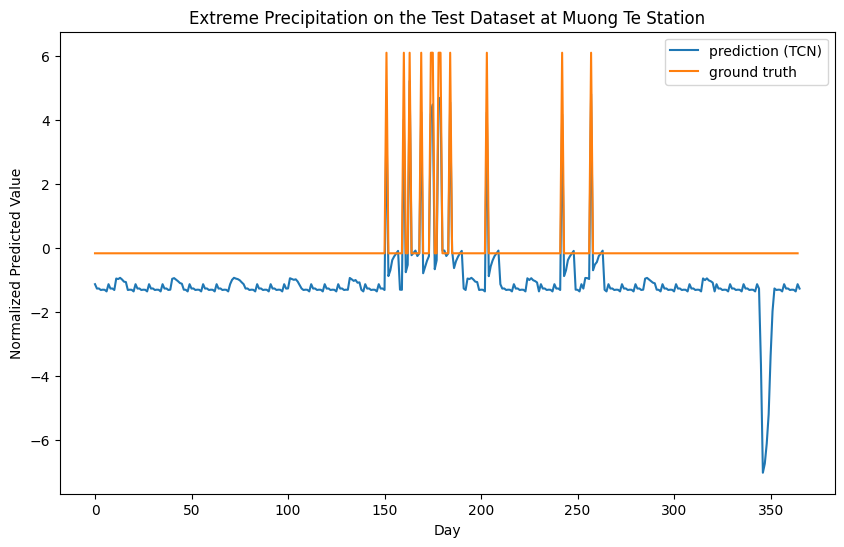

In [104]:
plt.figure(figsize=(10,6))
plt.plot(p_valid_tcn[:,:,0][:,-1][horizon:horizon+366]) # shift horizon time steps
plt.plot(y_valid[:,:,0][:,-1][0:365]) 
plt.legend(["prediction (TCN)", "ground truth"])
plt.title('Extreme Precipitation on the Test Dataset at Muong Te Station')
plt.xlabel('Day')
plt.ylabel('Normalized Predicted Value')

In [80]:
import numpy as np

In [81]:
def classify(p, epsilon=0.5):
    score = 1 / (1 + np.exp(-p))
    if score >= epsilon:
        return 1.0
    else:
        return 0.0

In [82]:
y_v = valid.unscale_numpy(y_valid)[:,:,0][:,-1][:-horizon]

In [83]:
sum(y_v)

55.0

In [84]:
z_v_tcn = [classify(p) for p in p_valid_tcn[:,:,0][:,-1]][horizon:]

In [85]:
sum(z_v_tcn)

55.0

In [86]:
import sklearn
import sklearn.metrics

In [87]:
# AUC score
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_v, z_v_tcn)
sklearn.metrics.auc(fpr, tpr)

1.0

In [500]:
print(sklearn.metrics.classification_report(y_v, z_v_tcn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1210
         1.0       1.00      1.00      1.00       147

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357

